In [42]:
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
import pandas as pd
salary=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\simple linear regression\\Salary_Data.csv")

In [43]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Checking for missing values

In [44]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### There are no missing values in the data


### Checking for duplicte values in the data

In [45]:
salary[salary.duplicated()]

,YearsExperience,Salary


### There are no duplicate values in the data

<AxesSubplot:>

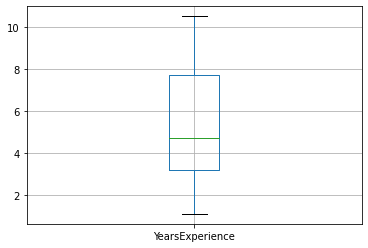

In [46]:
salary[['YearsExperience']].boxplot()

<AxesSubplot:>

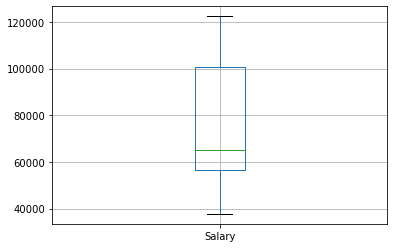

In [47]:
salary[['Salary']].boxplot()

### There are no outliers in the data

### Checking correlation


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

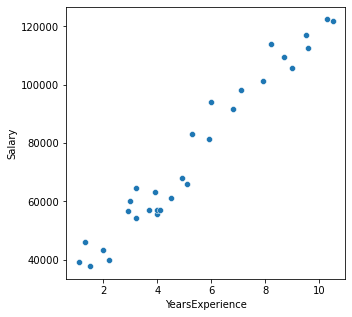

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'YearsExperience',y = 'Salary',data = salary,palette = 'Set1')

<AxesSubplot:xlabel='Salary', ylabel='Density'>

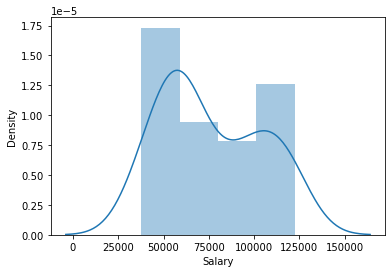

In [49]:
sns.distplot(salary['Salary'])

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


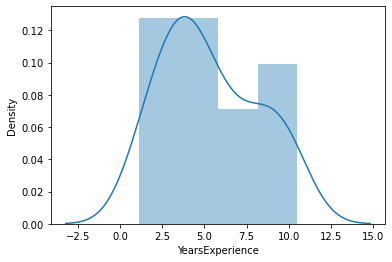

In [50]:

sns.distplot(salary['YearsExperience'])
salary.corr()

### Years and salary seems to be highly correlated

### Trying different transformations

In [51]:
import numpy as np
salary['ye_sq']=salary.YearsExperience**2
salary['ye_sqrt']=salary.YearsExperience**0.5
salary['ye_log']=np.log(salary.YearsExperience)

In [52]:
salary.corr()

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log
YearsExperience,1.000000,0.978242,0.977067,0.989850,0.953797
Salary,0.978242,1.000000,0.956724,0.964884,0.924061
ye_sq,0.977067,0.956724,1.000000,0.937950,0.872019
ye_sqrt,0.989850,0.964884,0.937950,1.000000,0.986620
ye_log,0.953797,0.924061,0.872019,0.986620,1.000000


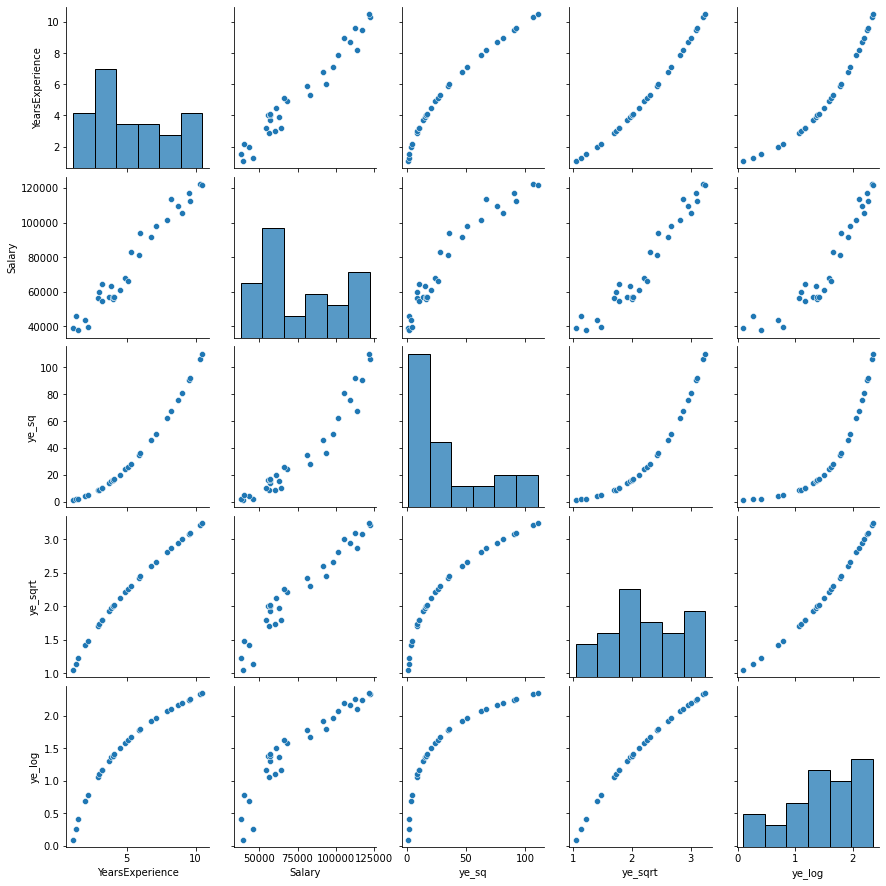

In [53]:
sns.pairplot(salary)

### Square root and square transformations have a similar correlation

### Making model

In [54]:

model=smf.ols("Salary~YearsExperience",data=salary).fit()
model_sqrt=smf.ols("Salary~ye_sqrt",data=salary).fit()
model_sq=smf.ols("Salary~ye_sq",data=salary).fit()

In [56]:
print(model.rsquared,model_sqrt.rsquared,model_sq.rsquared)

0.9569566641435086 0.9310009544993526 0.9153198857852565


### Unstransformed data has higher rsquared value even though others had similar or higher correlation

### rsquared value is above 95%

In [55]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

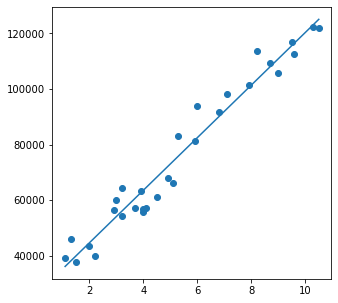

In [21]:
fig=plt.figure(figsize=(5,5))
plt.plot(salary["YearsExperience"],model.fittedvalues)
plt.scatter(salary["YearsExperience"],salary.Salary)

In [22]:
model.resid
model.rsquared
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [24]:
salary["predicted"]=model.fittedvalues

In [25]:
salary

,YearsExperience,Salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


### Predicting for a new data

In [31]:
new=pd.DataFrame({'YearsExperience':[3,4.5]})


In [32]:
model.predict(new)

0    54142.087163
1    68317.030645
dtype: float64

In [33]:
new['predicted']=model.predict(new)
new

,YearsExperience,predicted
0,3.0,54142.087163
1,4.5,68317.030645
